<a href="https://colab.research.google.com/github/MQsparrow/ml0616/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# 整理資料/資料預處理
# pandas 2型態: DataFrame(chart - 2d)/Series(line/row - 1d)
# 多少資料量足夠?
# 依問題難易度決定欄位數量(簡單<->少; 難<->多)
# ml: 10^3~10^4; dl: 10^4~10^5
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
# 資料分為兩分
# 機器學習: numpy
import numpy as np
# 型態: numpy array
x = np.array(df.drop(["ans"], axis=1))
y = np.array(df["ans"])

In [33]:
# 9:1(V) v 8:2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 135\nvalue = [45, 45, 45]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 90\nvalue = [0, 45, 45]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.117\nsamples = 48\nvalue = [0, 45, 3]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 42\nvalue = [0, 0, 42]\nclass = virginica')]

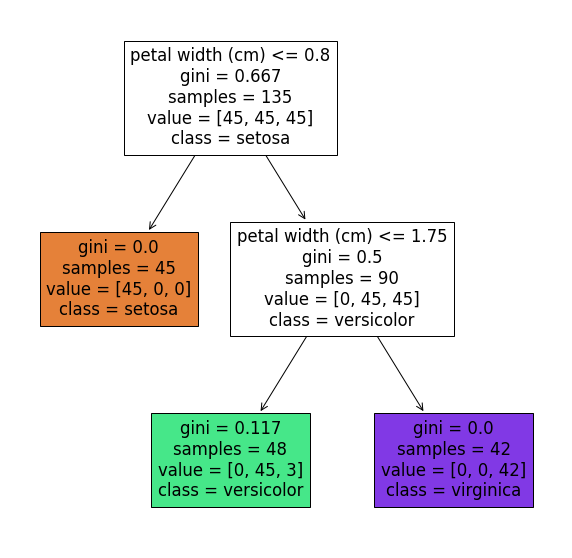

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(clf, 
          feature_names=iris["feature_names"], 
          class_names=iris["target_names"], 
          filled=True)

In [30]:
# 驗證模型表現
# 選擇評估標準(分類): 1. 正確率 2. fl score(imbalanced)
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

1.0